In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv("data/nasa_dataset/output_area_2.csv")

In [20]:
if "day" in df.columns:
    df.rename(columns={"day": "day_night"}, inplace=True)

In [21]:
df.head()

,year,month,temperature,RH,wind_speed,frp,day_night,daily_cdd,daily_hdd,perc_frp,burned_area
0,2015,1,9.284265,0.689222,6.951015,6.4,1,0.000000,0.715735,0.055315,84.305037
1,2015,1,10.481195,0.716552,15.878100,9.9,1,0.481195,0.000000,0.085566,130.409354
2,2015,1,0.069574,0.751346,7.876296,19.8,1,0.000000,9.930426,0.171132,260.818709
3,2015,1,1.479761,0.769021,10.005970,7.8,1,0.000000,8.520239,0.067416,102.746764
4,2015,1,6.572412,0.608134,2.239136,8.3,1,0.000000,3.427588,0.071737,109.333095


In [22]:
df.shape

(5279, 11)

## Dataset Information
* Year
* Month
* Temperature: temperature in Celsius degrees
* RH:          relative humidity in %
* Wind_speed:  wind speed in km/h
* frp:         Fire radiation power
* day_night:   indicate fire occured at day or night
* daily_cdd:   indicate how much of the 24 h it is cold
* daily_hdd:   indicate how much of the 24 h it is hot
* perc_frp:    percantage of frp monthly
* burned_area: the burned area of the forest (in ha)

### Check Missing Values

In [23]:
df.isna().sum()

year           0
month          0
temperature    0
RH             0
wind_speed     0
frp            0
day_night      0
daily_cdd      0
daily_hdd      0
perc_frp       0
burned_area    0
dtype: int64

### Check Duplicates

In [24]:
df.duplicated().sum()

68

In [25]:
df[df.duplicated()]

,year,month,temperature,RH,wind_speed,frp,day_night,daily_cdd,daily_hdd,perc_frp,burned_area
157,2015,6,23.997797,0.345502,1.578224,6.3,1,13.997797,0.0,0.001503,243.640438
553,2015,8,29.474725,0.294372,4.252460,9.0,1,19.474725,0.0,0.001553,220.404990
698,2015,9,30.646082,0.270595,1.678217,11.8,1,20.646082,0.0,0.000589,148.361345
702,2015,9,30.646082,0.270595,1.678217,7.2,1,20.646082,0.0,0.000360,90.525567
706,2015,9,30.646082,0.270595,1.678217,7.8,1,20.646082,0.0,0.000390,98.069364
...,...,...,...,...,...,...,...,...,...,...,...
4544,2017,10,17.032068,0.407724,5.089718,6.1,1,7.032068,0.0,0.001632,105.270504
4605,2017,10,18.311487,0.311643,8.693437,5.0,1,8.311487,0.0,0.001338,86.287299
4742,2017,10,18.404321,0.455302,5.783106,5.1,1,8.404321,0.0,0.001364,88.013045
4753,2017,10,18.607446,0.465922,5.700005,6.1,1,8.607446,0.0,0.001632,105.270504


### Check data types

In [26]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5279 entries, 0 to 5278
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         5279 non-null   int64  
 1   month        5279 non-null   int64  
 2   temperature  5279 non-null   float64
 3   RH           5279 non-null   float64
 4   wind_speed   5279 non-null   float64
 5   frp          5279 non-null   float64
 6   day_night    5279 non-null   int64  
 7   daily_cdd    5279 non-null   float64
 8   daily_hdd    5279 non-null   float64
 9   perc_frp     5279 non-null   float64
 10  burned_area  5279 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 453.8 KB


### Checking the number of unique values of each column

In [27]:
df.nunique()

year              4
month            12
temperature    2390
RH             2398
wind_speed     2400
frp             822
day_night         2
daily_cdd      2217
daily_hdd       175
perc_frp       3440
burned_area    3355
dtype: int64

### Check statistic of data set

In [28]:
df.describe()

,year,month,temperature,RH,wind_speed,frp,day_night,daily_cdd,daily_hdd,perc_frp,burned_area
count,5279.000000,5279.000000,5279.000000,5279.000000,5279.000000,5279.000000,5279.000000,5279.000000,5279.000000,5279.000000,5279.000000
mean,2016.193029,7.592347,23.908194,0.481314,4.405865,23.747679,0.925554,14.065956,0.157762,0.007198,359.552266
std,1.016937,2.215499,7.016968,0.181731,3.099402,44.456236,0.262520,6.626533,0.942296,0.016916,707.980541
min,2015.000000,1.000000,-3.185645,0.082753,0.022597,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,6.000000,19.610651,0.337268,2.283655,8.200000,1.000000,9.610651,0.000000,0.001075,66.270049
50%,2016.000000,8.000000,25.426691,0.461668,3.641334,12.700000,1.000000,15.426691,0.000000,0.002378,150.996666
75%,2017.000000,9.000000,29.154352,0.618438,5.749217,24.100000,1.000000,19.154352,0.000000,0.006089,376.013155
max,2018.000000,12.000000,40.190088,0.975530,22.422637,1147.600000,1.000000,30.190088,13.185645,0.486172,13113.875948


In [29]:
df.head()

,year,month,temperature,RH,wind_speed,frp,day_night,daily_cdd,daily_hdd,perc_frp,burned_area
0,2015,1,9.284265,0.689222,6.951015,6.4,1,0.000000,0.715735,0.055315,84.305037
1,2015,1,10.481195,0.716552,15.878100,9.9,1,0.481195,0.000000,0.085566,130.409354
2,2015,1,0.069574,0.751346,7.876296,19.8,1,0.000000,9.930426,0.171132,260.818709
3,2015,1,1.479761,0.769021,10.005970,7.8,1,0.000000,8.520239,0.067416,102.746764
4,2015,1,6.572412,0.608134,2.239136,8.3,1,0.000000,3.427588,0.071737,109.333095


In [53]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f"We have {len(numeric_features)} numerical features : {numeric_features}")
print(f"\nWe have {len(categorical_features)} categorical features : {categorical_features}")

We have 12 numerical features : ['year', 'month', 'temperature', 'RH', 'wind_speed', 'frp', 'day_night', 'daily_cdd', 'daily_hdd', 'perc_frp', 'burned_area', 'isFired']

We have 0 categorical features : []


In [32]:
df["isFired"] = (df['burned_area'] > 15)

In [33]:
print(f"There are {df[df['isFired'] == True]['isFired'].count()} burned area")

There are 4865 burned area


In [34]:
print(f"There are {df[df['isFired'] == False]['isFired'].count()} non-burned area")

There are 414 non-burned area


In [35]:
df.head()

,year,month,temperature,RH,wind_speed,frp,day_night,daily_cdd,daily_hdd,perc_frp,burned_area,isFired
0,2015,1,9.284265,0.689222,6.951015,6.4,1,0.000000,0.715735,0.055315,84.305037,True
1,2015,1,10.481195,0.716552,15.878100,9.9,1,0.481195,0.000000,0.085566,130.409354,True
2,2015,1,0.069574,0.751346,7.876296,19.8,1,0.000000,9.930426,0.171132,260.818709,True
3,2015,1,1.479761,0.769021,10.005970,7.8,1,0.000000,8.520239,0.067416,102.746764,True
4,2015,1,6.572412,0.608134,2.239136,8.3,1,0.000000,3.427588,0.071737,109.333095,True


### Insight
* August and September are the peaks of fire in forest. After these months, July and December comes.

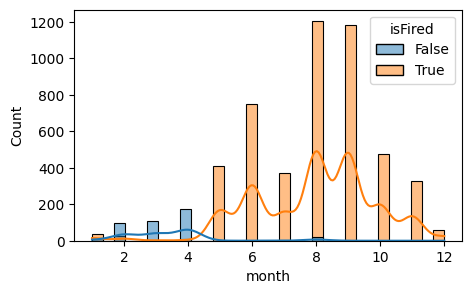

In [37]:
fig, axs = plt.subplots(1, figsize=(5, 3))
sns.histplot(data=df,x='month',kde=True,hue='isFired')
plt.show()

### Insight
There is a correlation between temperature and fire.

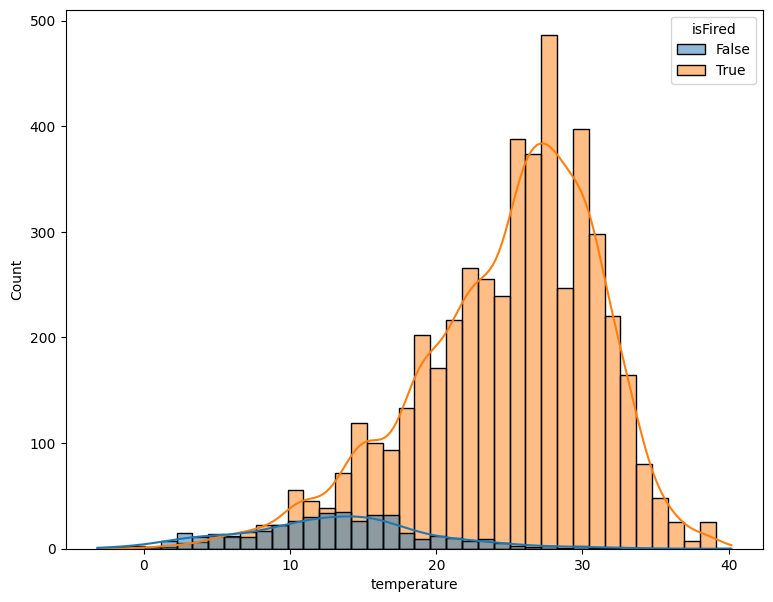

In [39]:
fig, axs = plt.subplots(1, figsize=(9, 7))
sns.histplot(data=df,x='temperature',kde=True,hue='isFired')
plt.show()

### Insight
* Can say that Humidity affect fire in forest. It seems that %40 +-%10 Humidity is a proper medium to fire.

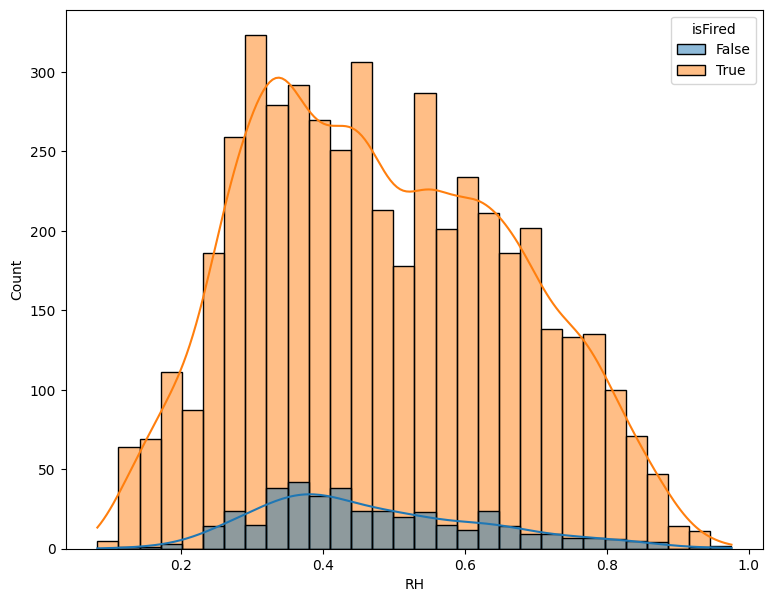

In [40]:
fig, axs = plt.subplots(1, figsize=(9, 7))
sns.histplot(data=df,x='RH',bins = 30,kde=True,hue='isFired')
plt.show()

## Feature Selection

In [93]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True)

In [94]:
x = df.drop(columns=['isFired'])
y = df['isFired']
x, y

(      year  month  temperature        RH  wind_speed   frp  day_night  \
 0     2015      1     9.284265  0.689222    6.951015   6.4          1   
 1     2015      1    10.481195  0.716552   15.878100   9.9          1   
 2     2015      1     0.069574  0.751346    7.876296  19.8          1   
 3     2015      1     1.479761  0.769021   10.005970   7.8          1   
 4     2015      1     6.572412  0.608134    2.239136   8.3          1   
 ...    ...    ...          ...       ...         ...   ...        ...   
 5274  2018      6    21.583490  0.557554    4.279598   8.7          1   
 5275  2018      6    21.583490  0.557554    4.279598   9.6          1   
 5276  2018      6    21.583490  0.557554    4.279598   7.7          1   
 5277  2018      6    22.098138  0.870264    3.978109   8.9          1   
 5278  2018      6    24.552820  0.570864    8.594997  18.3          1   
 
       daily_cdd  daily_hdd  perc_frp  burned_area  
 0      0.000000   0.715735  0.055315    84.305037  
 1  

In [95]:
if 'isFired' in numeric_features or "burned_area" in numeric_features:
    numeric_features.remove('isFired')
    numeric_features.remove("burned_area")
numeric_features

['year',
 'month',
 'temperature',
 'RH',
 'wind_speed',
 'frp',
 'day_night',
 'daily_cdd',
 'daily_hdd',
 'perc_frp']

In [96]:
categorical_features

[]

In [97]:
## Data Preperation
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_pipeline = Pipeline(
    steps = [
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler(with_mean=False))
    ]
)

cat_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("one_hot_encoder", OneHotEncoder()),
        #("scaler", StandardScaler(with_mean=False))
    ]
)

preprocessor = ColumnTransformer(
    [
        ("num_pipeline", num_pipeline, numeric_features),
        #("cat_pipeline", cat_pipeline, categorical_features)
    ]
)

In [108]:
if "burned_area" in x.columns:
    x = x.drop(columns=["burned_area"])

In [109]:
'''from sklearn.preprocessing import OneHotEncoder

# Assuming 'x' is your DataFrame
# Assuming 'month' is the column you want to one-hot encode

# Reshape the 'month' column to a 2D array
x_month_reshaped = x['month'].values.reshape(-1, 1)

# Apply OneHotEncoder
encoder = OneHotEncoder()
encoded_month = encoder.fit_transform(x_month_reshaped)

# Convert the result to a DataFrame (optional)
encoded_month_df = pd.DataFrame(encoded_month.toarray(), columns=encoder.get_feature_names_out(['month']))

# Replace the original 'month' column in your DataFrame with the encoded values
x = pd.concat([x.drop('month', axis=1), encoded_month_df], axis=1)'''


"from sklearn.preprocessing import OneHotEncoder\n\n# Assuming 'x' is your DataFrame\n# Assuming 'month' is the column you want to one-hot encode\n\n# Reshape the 'month' column to a 2D array\nx_month_reshaped = x['month'].values.reshape(-1, 1)\n\n# Apply OneHotEncoder\nencoder = OneHotEncoder()\nencoded_month = encoder.fit_transform(x_month_reshaped)\n\n# Convert the result to a DataFrame (optional)\nencoded_month_df = pd.DataFrame(encoded_month.toarray(), columns=encoder.get_feature_names_out(['month']))\n\n# Replace the original 'month' column in your DataFrame with the encoded values\nx = pd.concat([x.drop('month', axis=1), encoded_month_df], axis=1)"

In [110]:
preprocessor.fit_transform(x)
x, y

(      year  month  temperature        RH  wind_speed   frp  day_night  \
 0     2015      1     9.284265  0.689222    6.951015   6.4          1   
 1     2015      1    10.481195  0.716552   15.878100   9.9          1   
 2     2015      1     0.069574  0.751346    7.876296  19.8          1   
 3     2015      1     1.479761  0.769021   10.005970   7.8          1   
 4     2015      1     6.572412  0.608134    2.239136   8.3          1   
 ...    ...    ...          ...       ...         ...   ...        ...   
 5274  2018      6    21.583490  0.557554    4.279598   8.7          1   
 5275  2018      6    21.583490  0.557554    4.279598   9.6          1   
 5276  2018      6    21.583490  0.557554    4.279598   7.7          1   
 5277  2018      6    22.098138  0.870264    3.978109   8.9          1   
 5278  2018      6    24.552820  0.570864    8.594997  18.3          1   
 
       daily_cdd  daily_hdd  perc_frp  
 0      0.000000   0.715735  0.055315  
 1      0.481195   0.000000  0

In [111]:
pca.fit(x, y)

PCA(n_components=2, whiten=True)

In [112]:
x_pca = pca.transform(x)

In [113]:
print("variance ratio: ", pca.explained_variance_ratio_)
print("sum: ", sum(pca.explained_variance_ratio_))

variance ratio:  [0.95082641 0.04168145]
sum:  0.9925078569538763


In [114]:
df_pc = pd.DataFrame({'var': pca.explained_variance_ratio_, 'PCA' : ['PCA' + str(i + 1) for i in range(len(pca.explained_variance_ratio_))]})
df_pc

,var,PCA
0,0.950826,PCA1
1,0.041681,PCA2


Explained Variance Ratio:
 [0.95082641 0.04168145]

Cumulative Explained Variance:
 [0.95082641 0.99250786]


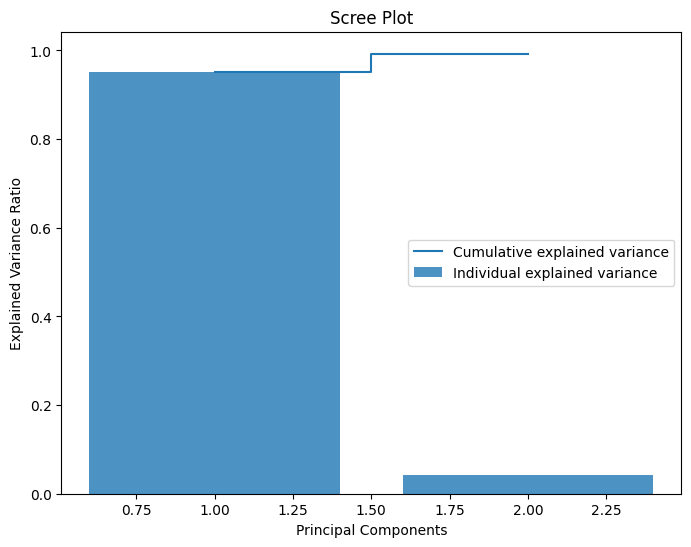

In [115]:
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Print results
print("Explained Variance Ratio:\n", explained_variance_ratio)
print("\nCumulative Explained Variance:\n", cumulative_explained_variance)

# Plot Scree Plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.8, align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, where='mid', label='Cumulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.legend()
plt.show()

In [117]:
weights_of_features_in_pc1 = pca.components_[0]

# Now you can associate these weights with the corresponding feature names
feature_names = list(x.columns)  # Assuming you have named columns in your DataFrame
weights_and_features = list(zip(weights_of_features_in_pc1, feature_names))

# Print the feature names and their corresponding weights in the first principal component
for weight, feature in weights_and_features:
    print(f"Feature: {feature}, Weight in PC1: {weight}")

Feature: year, Weight in PC1: 0.0010142184248733972
Feature: month, Weight in PC1: -3.399342509169401e-05
Feature: temperature, Weight in PC1: 0.04380824924117466
Feature: RH, Weight in PC1: -0.0006964599145504857
Feature: wind_speed, Weight in PC1: 0.001775837751115547
Feature: frp, Weight in PC1: 0.9981256232450226
Feature: day_night, Weight in PC1: 9.280347401169516e-05
Feature: daily_cdd, Weight in PC1: 0.04266239562573583
Feature: daily_hdd, Weight in PC1: -0.0011458536154387439
Feature: perc_frp, Weight in PC1: 8.646353038359094e-05


<Axes: >

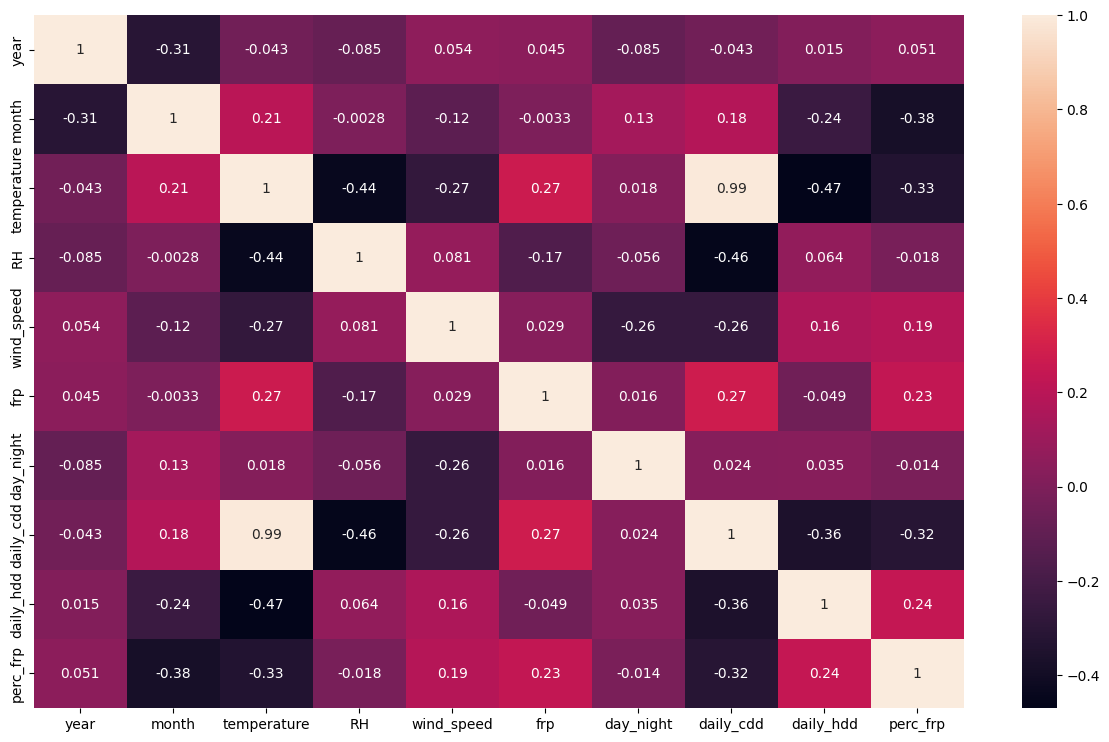

In [118]:
plt.figure(figsize=(15, 9))
sns.heatmap(x.corr(), annot=True)

## Random Forest Classifier


In [120]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)

In [129]:
if 'area' in x.columns:
    x = x.drop(columns=['area'])
y = y.astype(int)
print(y)
model.fit(x, y)

0       1
1       1
2       1
3       1
4       1
       ..
5274    1
5275    1
5276    1
5277    1
5278    1
Name: isFired, Length: 5279, dtype: int32


RandomForestClassifier()

In [132]:
importances = model.feature_importances_

final_df = pd.DataFrame({'Features': x.columns, 'Importance': importances})
final_df = final_df.sort_values('Importance')
final_df

,Features,Importance
6,day_night,0.001930
8,daily_hdd,0.015991
4,wind_speed,0.019586
0,year,0.027975
3,RH,0.031743
5,frp,0.039762
7,daily_cdd,0.074022
2,temperature,0.090138
9,perc_frp,0.162880
1,month,0.535971


In [133]:
final_df.plot.bar(x=final_df)

ValueError: Boolean array expected for the condition, not object

In [134]:
removal_rows = ['X', 'Y', 'DC', 'DMC', 'ISI', 'FFMC']
final_df = final_df[final_df['Features'].isin()]
final_df['Importance'].sum()

TypeError: Series.isin() missing 1 required positional argument: 'values'